In [10]:

from src.data import preprocessing as prep
data_list,label_list = prep.loaddata()

In [7]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import glob

def loaddata():
  file_paths = '../data/raw/'
  filenames = glob.glob(file_paths+"*[0-9].csv",recursive = True)
  list_of_dfs = [pd.read_csv(filename) for filename in filenames]
  data_list = []
  for dataframe, filename in zip(list_of_dfs, filenames):
    dataframe=dataframe.drop(columns=['acc_x','acc_y','acc_z','roll', 'pitch', 'yaw','event'])
    data_datetime = dataframe.copy()
    data_datetime['#timestamp']=data_datetime['#timestamp'] / 1e3
    data_datetime['#timestamp']=data_datetime['#timestamp'].apply(lambda x: pd.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.%f'))
    data_list.append(data_datetime)
  labelfilenames = glob.glob(file_paths+"*.txt",recursive = True)
  list_of_labeldfs = [pd.read_csv(filename, sep=";") for filename in labelfilenames]
  label_list = []
  for dataframe, filename in zip(list_of_labeldfs, labelfilenames):
      data_label=dataframe[['Time', 'trl', 'nosezone.touches', 'mouthzone.touches', 'eyezone.right eye', 'eyezone.left eye']].copy()
      data_label.columns = ['timeAfterStart', 'isTouch', 'nose', 'mouth', 'rightEye', 'leftEye']
      label_list.append(data_label)
  return data_list, label_list

In [8]:
data_list,label_list = loaddata()

In [1]:
import pandas as pd

data= pd.read_csv('../data/data_huidi/raw/2020-06-11_21-50-05.csv')
data.head()

,#timestamp,left1,left2,right2,right2.1,acc_x,acc_y,acc_z,roll,pitch,yaw,event
0,1591905005020,131,-38,176,-7,-1619,8585,-13908,0,NaN,NaN,NaN
1,1591905005042,129,-43,178,-8,-1533,8908,-13958,0,NaN,NaN,NaN
2,1591905005057,131,-39,186,1,-1407,9376,-13950,0,NaN,NaN,NaN
3,1591905005079,112,-64,165,-29,-1358,9632,-13927,0,NaN,NaN,NaN
4,1591905005102,108,-52,159,-16,-1475,9826,-14069,0,NaN,NaN,NaN


In [5]:
data.iloc[0,0]

1591905005020

In [2]:
data_datetime= data.copy()

In [6]:
data_datetime.iloc[:, 0] / 1e3

0         1.591905e+09
1         1.591905e+09
2         1.591905e+09
3         1.591905e+09
4         1.591905e+09
              ...     
181767    1.591909e+09
181768    1.591909e+09
181769    1.591909e+09
181770    1.591909e+09
181771    1.591909e+09
Name: #timestamp, Length: 181772, dtype: float64

In [16]:
data_datetime.drop(columns=['acc_x','acc_y','acc_z','roll', 'pitch', 'yaw','event'])

,#timestamp,left1,left2,right2,right2.1
0,2020-07-11 19:37:35.281000,172,-39,116,-63
1,2020-07-11 19:37:35.303000,198,-29,143,-49
2,2020-07-11 19:37:35.318000,214,-38,164,-54
3,2020-07-11 19:37:35.340000,192,-33,141,-49
4,2020-07-11 19:37:35.363000,198,-36,147,-53
...,...,...,...,...,...
25952,2020-07-11 19:46:14.373000,29,-185,-233,-452
25953,2020-07-11 19:46:14.390000,-132,-348,-414,-634
25954,2020-07-11 19:46:14.414000,-342,-570,-635,-837
25955,2020-07-11 19:46:14.440000,-628,-870,-862,-1044


In [17]:
data_datetime

,#timestamp,left1,left2,right2,right2.1,acc_x,acc_y,acc_z,roll,pitch,yaw,event
0,2020-07-11 19:37:35.281000,172,-39,116,-63,135,994,-16245,0,NaN,NaN,NaN
1,2020-07-11 19:37:35.303000,198,-29,143,-49,39,1018,-16347,0,NaN,NaN,NaN
2,2020-07-11 19:37:35.318000,214,-38,164,-54,11,876,-16487,0,NaN,NaN,NaN
3,2020-07-11 19:37:35.340000,192,-33,141,-49,-179,725,-16699,0,NaN,NaN,NaN
4,2020-07-11 19:37:35.363000,198,-36,147,-53,-359,420,-16904,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
25952,2020-07-11 19:46:14.373000,29,-185,-233,-452,-11395,2794,11194,0,NaN,NaN,NaN
25953,2020-07-11 19:46:14.390000,-132,-348,-414,-634,-11704,2653,10590,0,NaN,NaN,NaN
25954,2020-07-11 19:46:14.414000,-342,-570,-635,-837,-12942,320,10277,0,NaN,NaN,NaN
25955,2020-07-11 19:46:14.440000,-628,-870,-862,-1044,-13772,-179,9684,0,NaN,NaN,NaN


In [3]:
import datetime 
data_datetime['#timestamp']=data_datetime['#timestamp'] / 1e3
data_datetime['#timestamp']=data_datetime['#timestamp'].apply(lambda x: pd.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.%f'))

In [4]:
data_datetime.head()

,#timestamp,left1,left2,right2,right2.1,acc_x,acc_y,acc_z,roll,pitch,yaw,event
0,2020-06-11 21:50:05.020000,131,-38,176,-7,-1619,8585,-13908,0,NaN,NaN,NaN
1,2020-06-11 21:50:05.042000,129,-43,178,-8,-1533,8908,-13958,0,NaN,NaN,NaN
2,2020-06-11 21:50:05.057000,131,-39,186,1,-1407,9376,-13950,0,NaN,NaN,NaN
3,2020-06-11 21:50:05.079000,112,-64,165,-29,-1358,9632,-13927,0,NaN,NaN,NaN
4,2020-06-11 21:50:05.102000,108,-52,159,-16,-1475,9826,-14069,0,NaN,NaN,NaN


In [2]:
data_l1=data['left1']
data_r1=data['right2']

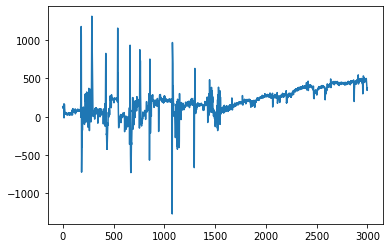

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data_l1.head(3000))

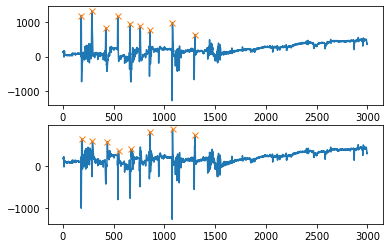

In [14]:
from scipy.signal import find_peaks
peaks_l1, _ = find_peaks(data_l1.head(3000), prominence=800)
peaks_r1, _ = find_peaks(data_r1.head(3000), prominence=800)
plt.subplot(211)
plt.plot(data_l1.head(3000))
plt.plot(peaks_l1, data_l1[peaks_l1].head(3000), "x")
plt.subplot(212)
plt.plot(data_r1.head(3000))
plt.plot(peaks_r1, data_r1[peaks_r1].head(3000), "x")

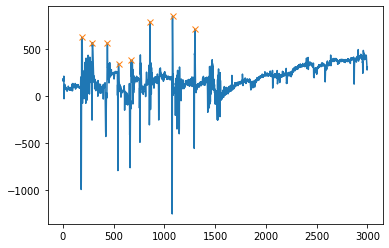

In [9]:
peaks_r1, _ = find_peaks(data_r1.head(3000), prominence=800)
plt.plot(data_r1.head(3000))
plt.plot(peaks_r1, data_r1[peaks_r1].head(3000), "x")

In [ ]:
from skmultiflow.data.data_stream import DataStream
stream=DataStream(data)
stream.prepare_for_use()
X,y=stream.next_sample(10000)

In [ ]:
#from src.data import loaddata

In [1]:
import glob
import datetime  
import pandas as pd
file_paths = '../data/data_huidi/raw/'
filenames = glob.glob(file_paths+"*[0-9].csv",recursive = True)
list_of_dfs = [pd.read_csv(filename) for filename in filenames]
data_list = []
for dataframe, filename in zip(list_of_dfs, filenames):
  dataframe=dataframe.drop(columns=['acc_x','acc_y','acc_z','roll', 'pitch', 'yaw','event'])
  data_datetime = dataframe.copy()
  data_datetime['#timestamp']=data_datetime['#timestamp'] / 1e3
  data_datetime['#timestamp']=data_datetime['#timestamp'].apply(lambda x: pd.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.%f'))
  data_list.append(data_datetime)


In [23]:
filenames

['../data/data_huidi/raw/2020-06-11_21-50-05.csv',
 '../data/data_huidi/raw/2020-06-12_10-31-50.csv',
 '../data/data_huidi/raw/2020-07-03_13-20-25.csv',
 '../data/data_huidi/raw/2020-07-06_10-52-06.csv',
 '../data/data_huidi/raw/2020-07-08_21-04-45.csv',
 '../data/data_huidi/raw/2020-07-11_19-37-35.csv']

In [22]:
len(data_list)

6

In [2]:
labelfilenames = glob.glob(file_paths+"*.txt",recursive = True)
labelfilenames
df=pd.read_csv(labelfilenames[0], sep=";",header=0)
df_short=df[['Time', 'trl', 'nosezone.touches', 'mouthzone.touches', 'eyezone.right eye', 'eyezone.left eye']].copy()

In [2]:
from dateparser.search import search_dates
search_dates(labelfilenames[0])


ModuleNotFoundError: No module named 'dateparser'

In [12]:
df_short

,Time,trl,nosezone.touches,mouthzone.touches,eyezone.right eye,eyezone.left eye
0,0.00,-1000,-1000,-1000,-1000,-1000
1,0.04,-1000,-1000,-1000,-1000,-1000
2,0.08,-1000,-1000,-1000,-1000,-1000
3,0.12,-1000,-1000,-1000,-1000,-1000
4,0.16,-1000,-1000,-1000,-1000,-1000
...,...,...,...,...,...,...
90829,3633.16,-1000,-1000,-1000,-1000,-1000
90830,3633.20,-1000,-1000,-1000,-1000,-1000
90831,3633.24,-1000,-1000,-1000,-1000,-1000
90832,3633.28,-1000,-1000,-1000,-1000,-1000
